<a href="https://colab.research.google.com/github/IagoConrado/colab-notebooks/blob/master/Video_Games_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados de Vendas de Video Games**

*   Link do Dataset: [Video Games Sales](https://www.kaggle.com/gregorut/videogamesales)
*   Dataset contém uma lista de video games com mais de 100.000 copias vendidas. Foi gerado com dados extraídos do site [vgchartz.com](vgchartz.com) no ano de 2016.
*   Campos presentes:
  *   Rank - Ranking geral de vendas
  *   Name - Nome do jogo
  *   Platform - Plataforma de lançamento do jogo
  *   Year - Ano de lançamento do jogo
  *   Genre - Gênero do jogo
  *   Publisher - Publicadora do jogo
  *   NA_Sales - Vendas na América do Norte (em milhões)
  *   EU_Sales - Vendas na Europa (em milhões)
  *   JP_Sales - Vendas no Japão (em milhões)
  *   Other_Sales - Vendas no resto do mundo (em milhões)
  *   Global_Sales - Vendas totais em todo o mundo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Carregamento/Leitura dos Dados**

In [ ]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/vgsales.csv')

In [ ]:
dados.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## **Leitura e organização dos dados**

In [ ]:
#remover coluna Rank para evitar a presença de 2 identificadores
dados = dados.drop(columns=['Rank'])
dados.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#checar quantos campos de cada coluna tem dados faltantes
dados.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Há 271 campos de ano de lançamento(Year) e 58 de Publicadoras(Publisher) vazios, esses jogos não serão removidos pois eles ainda contribuem com a quantidade de jogos para as plataformas ou no valor das vendas. É possível diminuir a quantidade de dados faltantes na coluna Year já que alguns jogos apresentam o ano de lançamento no próprio nome.

In [ ]:
#função para verificar se a string possui quatro dígitos, já que assim ela pode estar relacionada ao ano
def check(arg):
  try:
    new_value = int(arg)
    return len(arg) == 4
  except:
    return False


names = dados[dados['Year'].isnull()]['Name']
index = dados[dados['Year'].isnull()]['Name'].index
dict_year = {}
for name, ind in zip(names, index):
  for word in name.split():
    if check(word):
      dict_year[ind] = int(word)
      break

print(len(dict_year))
#já que são poucas informações(15) é possivel checar com um print se os valores fazem sentido como ano de lançamento
#ou se não fazem sentido como ano de lançamento e apenas fazem parte do nome do jogo de fato, ex.: 1135 ou 3320
print(dict_year)

15
{179: 2004, 377: 2004, 470: 2006, 1649: 2003, 3501: 2002, 4797: 2003, 5162: 2003, 5669: 2005, 5901: 2003, 8929: 2005, 12922: 2011, 13870: 2006, 15739: 2007, 15865: 2008, 16057: 2008}


In [ ]:
#adicionar os valores nos campos correspondentes da coluna Year
for ind, year in dict_year.items():
  dados['Year'].iloc[ind] = year

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## **Análise preliminar dos dados**

Text(0.5, 1.0, 'Vendas globais por plataformas')

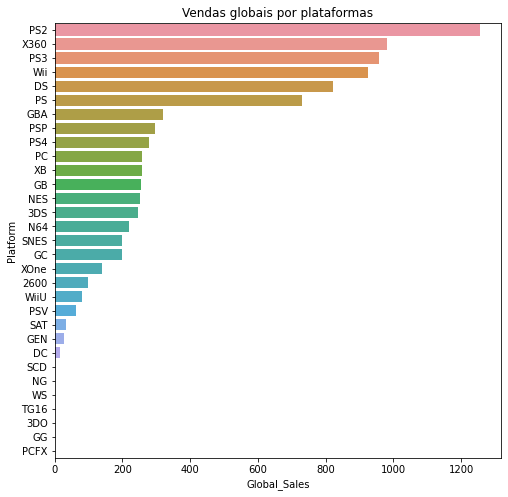

In [102]:
platform_global_sales = dados.groupby(by=['Platform'])['Global_Sales'].sum()
platform_global_sales = platform_global_sales.reset_index()
platform_global_sales = platform_global_sales.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(x='Global_Sales', y='Platform', data=platform_global_sales)
plt.title('Vendas globais por plataformas')

As plataformas que mais possuem vendas globais são PS2, X360 e PS3 respectivamente.

Text(0.5, 1.0, 'Vendas globais por gênero')

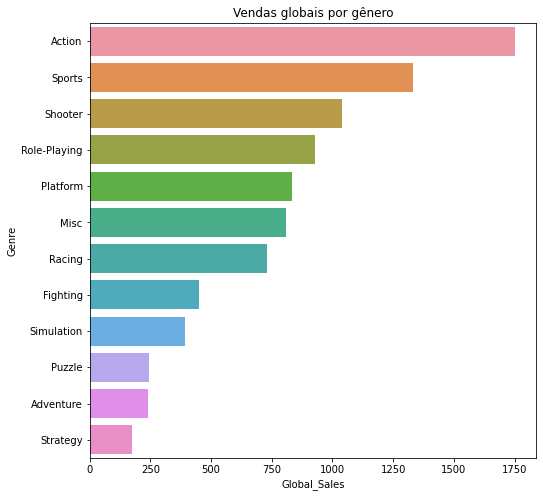

In [47]:
genre_global_sales = dados.groupby(by=['Genre'])['Global_Sales'].sum()
genre_global_sales = genre_global_sales.reset_index()
genre_global_sales = genre_global_sales.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(x='Global_Sales', y='Genre', data=genre_global_sales)
plt.title('Vendas globais por gênero')

Text(0.5, 1.0, 'Gêneros mais publicados')

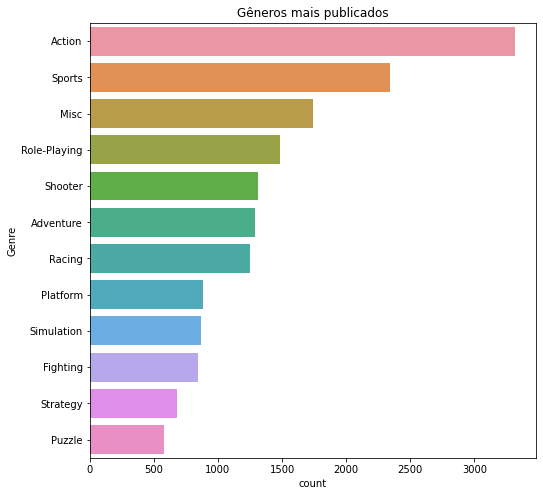

In [103]:
plt.figure(figsize=(8, 8))
sns.countplot(y = 'Genre', data=dados, order = dados['Genre'].value_counts().index)
plt.title('Gêneros mais publicados')

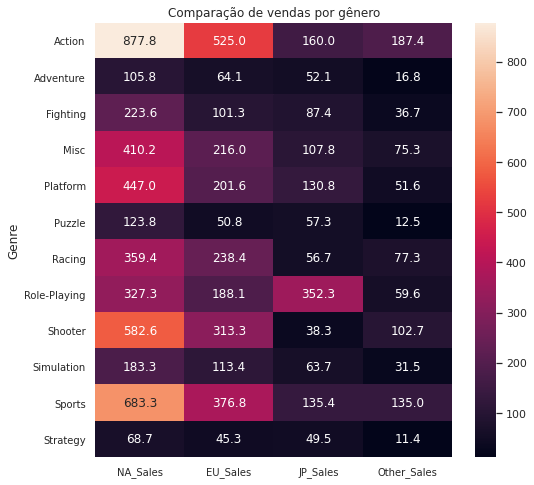

In [128]:
genre_comp = dados[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
genre_map = genre_comp.groupby(by=['Genre']).sum()
plt.figure(figsize=(8, 8))
sns.set(font_scale=1)
sns.heatmap(genre_map, annot=True, fmt = '.1f')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Comparação de vendas por gênero')
plt.show()

Os jogos mais vendidos são dos gêneros Action, Sports e Shooter.
Enquanto que os mais publicados são dos gêneros Action, Sports e Misc.
Os jogos de gênero Role-Playing são os mais vendidos no Japão, enquanto que os jogos de gênero Action são os mais vendidos na América do norte, na Europa e no resto do mundo.

Text(0.5, 1.0, '15 Publicadoras com mais vendas globais')

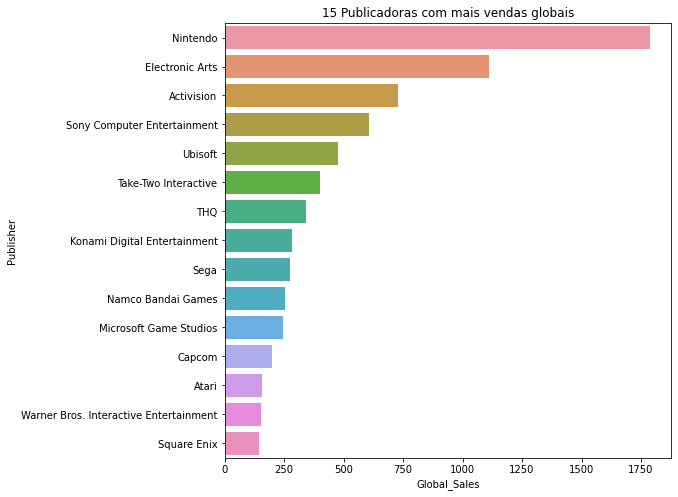

In [57]:
publisher_global_sales = dados[['Publisher', 'Global_Sales']]
publisher_global_sales = publisher_global_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(15)
publisher_global_sales = pd.DataFrame(publisher_global_sales).reset_index()
plt.figure(figsize=(8, 8))
sns.barplot(x='Global_Sales', y='Publisher', data=publisher_global_sales)
plt.title('15 Publicadoras com mais vendas globais')

Text(0.5, 1.0, '15 Publicadoras com mais publicações')

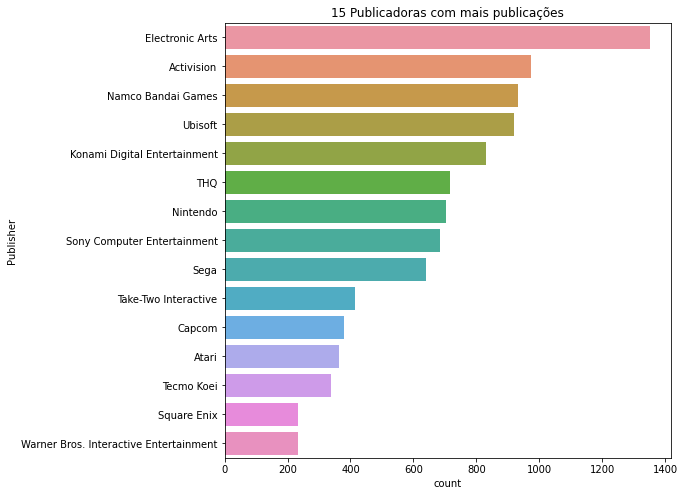

In [63]:
publisher_15 = dados.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(15)
publisher_15 = pd.DataFrame(publisher_15).reset_index()
plt.figure(figsize=(8, 8))
sns.countplot(y="Publisher", data=dados, order = dados.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:15].index)
plt.title('15 Publicadoras com mais publicações')

Com os 2 gráficos percebe-se que mesmo a Nintendo sendo a 7ª maior publicadora de jogos, ela é a que mais possui vendas mundialmente, enquanto que a Eletronic Arts e Activision que ocupam o 1° e 2° lugar em publicações estão em 2° e 3° lugar nas vendas.

Text(0.5, 1.0, 'Lançamentos de jogos por ano')

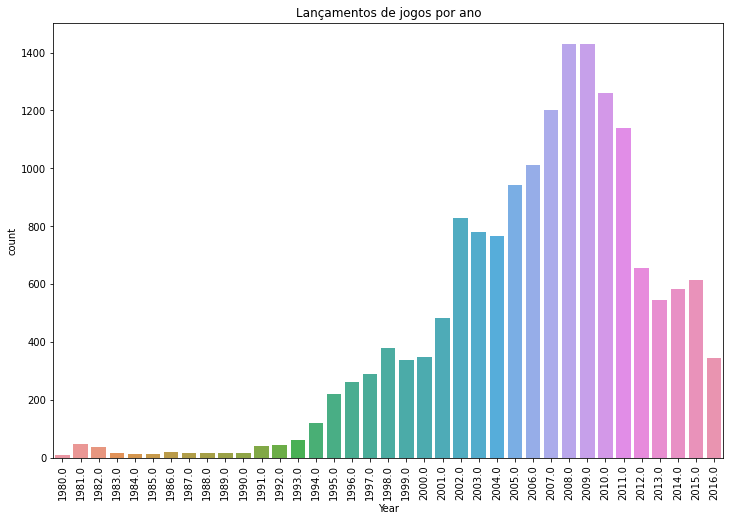

In [105]:
plt.figure(figsize=(12, 8))
year_list = dados.groupby(by=['Year'])['Name'].count().index
year_list = year_list[:-2]
sns.countplot(x = 'Year', data=dados, order = year_list)
plt.xticks(rotation=90)
plt.title('Lançamentos de jogos por ano')

Text(0.5, 1.0, 'Vendas de jogos por ano')

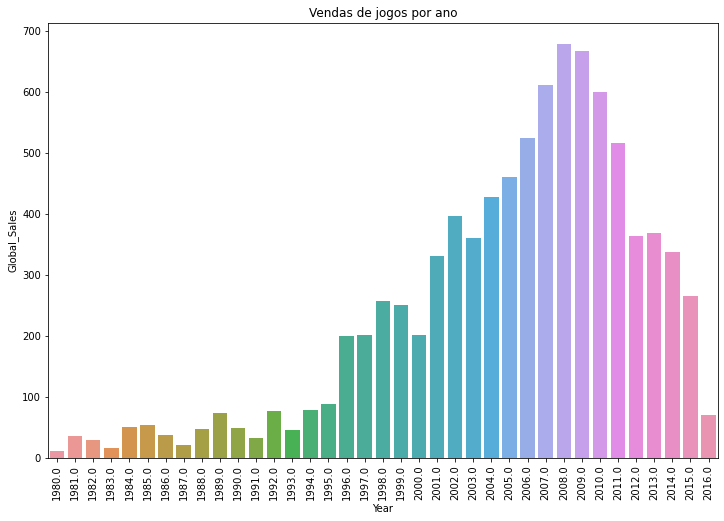

In [107]:
data_year = dados.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
data_year = data_year[:-2]
plt.figure(figsize=(12, 8))
sns.barplot(x ='Year', y= 'Global_Sales', data=data_year)
plt.xticks(rotation=90)
plt.title('Vendas de jogos por ano')

Os anos com as maiores quantidades de vendas foram 2008, 2009 e 2007.
Enquanto que os anos com os maiores números de lançamento foram 2009, 2008 e 2010.